### A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided in the datasets:

    1.Loanee Information (Demographic data like age, income, Identity proof etc.)
    2.Loan Information (Disbursal details, amount, EMI, loan to value ratio etc.)
    3.Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit-
      history etc.).
#### Doing so will ensure that clients capable of repayment are not rejected and important  determinants can be identified which can be further used for minimising the default rates.

#### Data Description
    1.train.zip contains train.csv and data_dictionary.csv.

    2.train.csv contains the training data with details on loan as described in the last section

    3.data_dictionary.csv contains a brief description on each variable provided in the training and test set.

### Your task is solve all the questions asked below.

#### 1. Import the necessary packages and install them using pip3 command from command prompt if the module is not found

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

ModuleNotFoundError: No module named 'plotly'

#### 2. Preprocess the necessary features in the dataframe and find the age of the applicants at the time of applying loan(in years). Add this as a new feature in the dataframe.

In [106]:
data = pd.read_csv('dataset/train.csv')

In [107]:
data['age_in_years'] = (pd.datetime.now().date() - pd.to_datetime(data['Date.of.Birth'], format='%d-%m-%y'))/365

In [108]:
data['age_in_years'] = data['age_in_years'].apply(lambda x: x.days)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 42 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

#### 3. Convert AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH into numerical columns by preprocessing. You've to convert the data into months. For example if the data point is 2 yrs and 3 month, the new column should have 27 as its feature. 

In [109]:
data['AVERAGE.ACCT.AGE.MONTHS'] = data['AVERAGE.ACCT.AGE'].apply(lambda x: int(re.findall(r'\d+',x)[0])*12+int(re.findall(r'\d+',x)[1]))

In [110]:
data['CREDIT.HISTORY.LENGTH.MONTHS'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(re.findall(r'\d+',x)[0])*12+int(re.findall(r'\d+',x)[1]))

#### 4. Find the top 5 positively correlated features with respect to the target and plot a bar graph with y-axis as a correlation and x-axis as feature names . (Bonus: You can also try polynomial featurization upto degree 3, find their correlation and add them as new features.)

In [168]:
corr = data.corr()
corr['loan_default'].sort_values(ascending=False)[1:6]

ltv                 0.098208
disbursed_amount    0.077675
State_ID            0.048075
VoterID_flag        0.043747
NO.OF_INQUIRIES     0.043678
Name: loan_default, dtype: float64

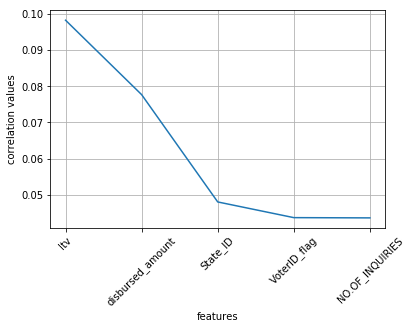

In [177]:
plt.plot(corr['loan_default'].sort_values(ascending=False)[1:6])
plt.xlabel('features')
plt.xticks(rotation=45)
plt.ylabel('correlation values')
plt.grid()
plt.show()

#### 5. Plot the distributions of most negatively correlated feature with respect to target values and see if you can find any trends

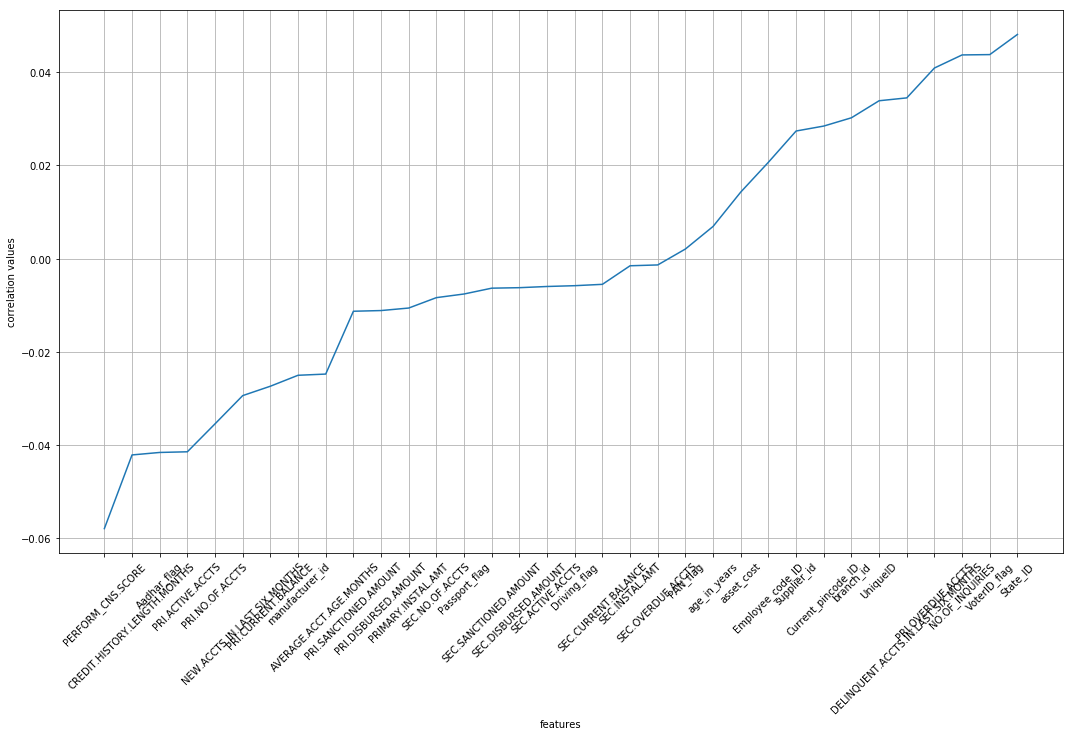

In [182]:
plt.figure(figsize=(18,10))
plt.plot(corr['loan_default'].sort_values(ascending=True)[:-4])
plt.xlabel('features')
plt.xticks(rotation=45)
plt.ylabel('correlation values')
plt.grid()
plt.show()

Personal loanee information does not seem to have high correlation with the target variable

#### 6. Find the mean age of the applicants with respect to the branch ID using group by function and add it as new feature. 

In [96]:
data['branch_average_age'] = data.groupby('branch_id')['age_in_years'].transform('mean')

#### 7. Using dimensionality reduction(PCA/TSNE), find the optimal number number of features using elbow method which preserves upto 90% variance.

In [99]:
from sklearn.preprocessing import StandardScaler

In [183]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 25 columns):
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
PERFORM_CNS.SCORE                      233154 non-null int64
PRI.NO.OF.ACCTS                        233154 non-null int64
PRI.ACTIVE.ACCTS                       233154 non-null int64
PRI.OVERDUE.ACCTS                      233154 non-null int64
PRI.CURRENT.BALANCE                    233154 non-null int64
PRI.SANCTIONED.AMOUNT                  233154 non-null int64
PRI.DISBURSED.AMOUNT                   233154 non-null int64
SEC.NO.OF.ACCTS                        233154 non-null int64
SEC.ACTIVE.ACCTS                       233154 non-null int64
SEC.OVERDUE.ACCTS                      233154 non-null int64
SEC.CURRENT.BALANCE                    233154 non-null int64
SEC.SANCTIONED.AMOUNT            

In [129]:
preprocessed_data = data.drop(['Date.of.Birth','Employment.Type','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH',
                               'UniqueID','Current_pincode_ID','State_ID','Employee_code_ID','MobileNo_Avl_Flag','Aadhar_flag',
                               'PAN_flag','VoterID_flag','Driving_flag','Passport_flag','branch_id','supplier_id',
                              'manufacturer_id','PERFORM_CNS.SCORE.DESCRIPTION'], axis=1)

In [130]:
preprocessed_data.head(5)

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,age_in_years,AVERAGE.ACCT.AGE.MONTHS,CREDIT.HISTORY.LENGTH.MONTHS
0,50578,58400,89.55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,35,0,0
1,47145,65550,73.23,598,1,1,1,27600,50200,50200,...,0,1991,0,0,1,0,1,33,23,23
2,53278,61360,89.63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,33,0,0
3,57513,66113,88.48,305,3,0,0,0,0,0,...,0,31,0,0,0,1,1,25,8,15
4,52378,60300,88.39,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,41,0,0


Remove target column

In [200]:
preprocessed_data = preprocessed_data.drop(['loan_default'], axis=1)

In [201]:
data_std = StandardScaler().fit_transform(preprocessed_data)

In [132]:
from sklearn.decomposition import PCA

In [206]:
pca = PCA(n_components=13)
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

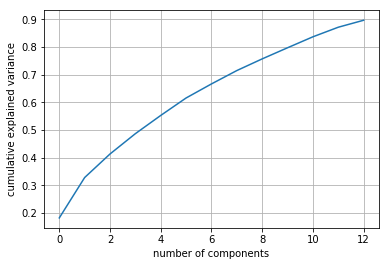

In [207]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

#### 8. Split the data obtained after dimensionality reduction into train, test and cross validation using stratified sampling.

In [208]:
columns = ['pca_%i' % i for i in range(13)]
data_pca = pd.DataFrame(pca.transform(data_std), columns=columns, index=preprocessed_data.index)

In [212]:
data_pca['loan_default'] = data['loan_default']

In [213]:
data_pca.head(5)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,loan_default
0,-1.222714,0.455686,0.325332,-0.670609,0.323866,-0.439869,1.121263,-0.960792,0.034998,0.384681,-0.278364,-0.131628,-0.205985,0
1,1.070270,-0.559526,-0.621475,-0.898160,-0.504937,1.136158,-0.496347,-1.576308,-0.938500,0.077172,0.342467,-0.018563,1.366387,1
2,-1.221487,0.448840,0.330173,-0.417025,0.273558,-0.418814,1.126334,-0.956322,0.096477,0.337357,-0.253601,-0.137290,-0.201445,0
3,-0.366460,0.020157,-0.260637,-0.004445,0.359435,-0.262815,1.458470,-0.233126,-0.040524,-0.150015,0.210608,0.877580,-0.077730,1
4,-1.098217,0.374722,0.186201,-0.431915,0.595066,-0.801369,1.234981,-0.735293,-0.549321,0.144963,0.095487,0.936269,-0.369061,1


In [219]:
print(data_pca.groupby(['loan_default']).size()/len(data_pca.index)*100)

loan_default
0    78.292888
1    21.707112
dtype: float64


In [215]:
from sklearn import model_selection

In [216]:
train, test = model_selection.train_test_split(data_pca, test_size=0.25, stratify=data_pca['loan_default'])

In [225]:
print(test.groupby(['loan_default']).size()/len(test.index)*100)

loan_default
0    78.292645
1    21.707355
dtype: float64


In [223]:
train, validation = model_selection.train_test_split(train, test_size=0.25, stratify=train['loan_default'])

In [224]:
print(validation.groupby(['loan_default']).size()/len(validation.index)*100)

loan_default
0    78.292198
1    21.707802
dtype: float64
